In [1]:
import numpy as np
import numpy.random as ra
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Higher-Dimensional Brownian Motion and Ito Integral

def BrownianMotion(stepsize=0.001, time=1, d=2):
    increments = ra.normal(scale=np.sqrt(stepsize), size=(d, int(time/stepsize)))
    increments = np.concatenate((np.zeros(shape=(d,1)), increments), axis=1)
    return np.cumsum(increments, axis=1)

def Time(stepsize=0.001, time=1):
    return np.array([i * stepsize for i in range(int(time/stepsize)+1)])

def ItoIntegral(f, B, stepsize=0.001):
    BT = np.transpose(B)
    increments = [0] + [np.dot(f(i * stepsize, *BT[i]), BT[i+1] - BT[i]) for i in range(len(BT)-1)]
    return np.cumsum(increments)

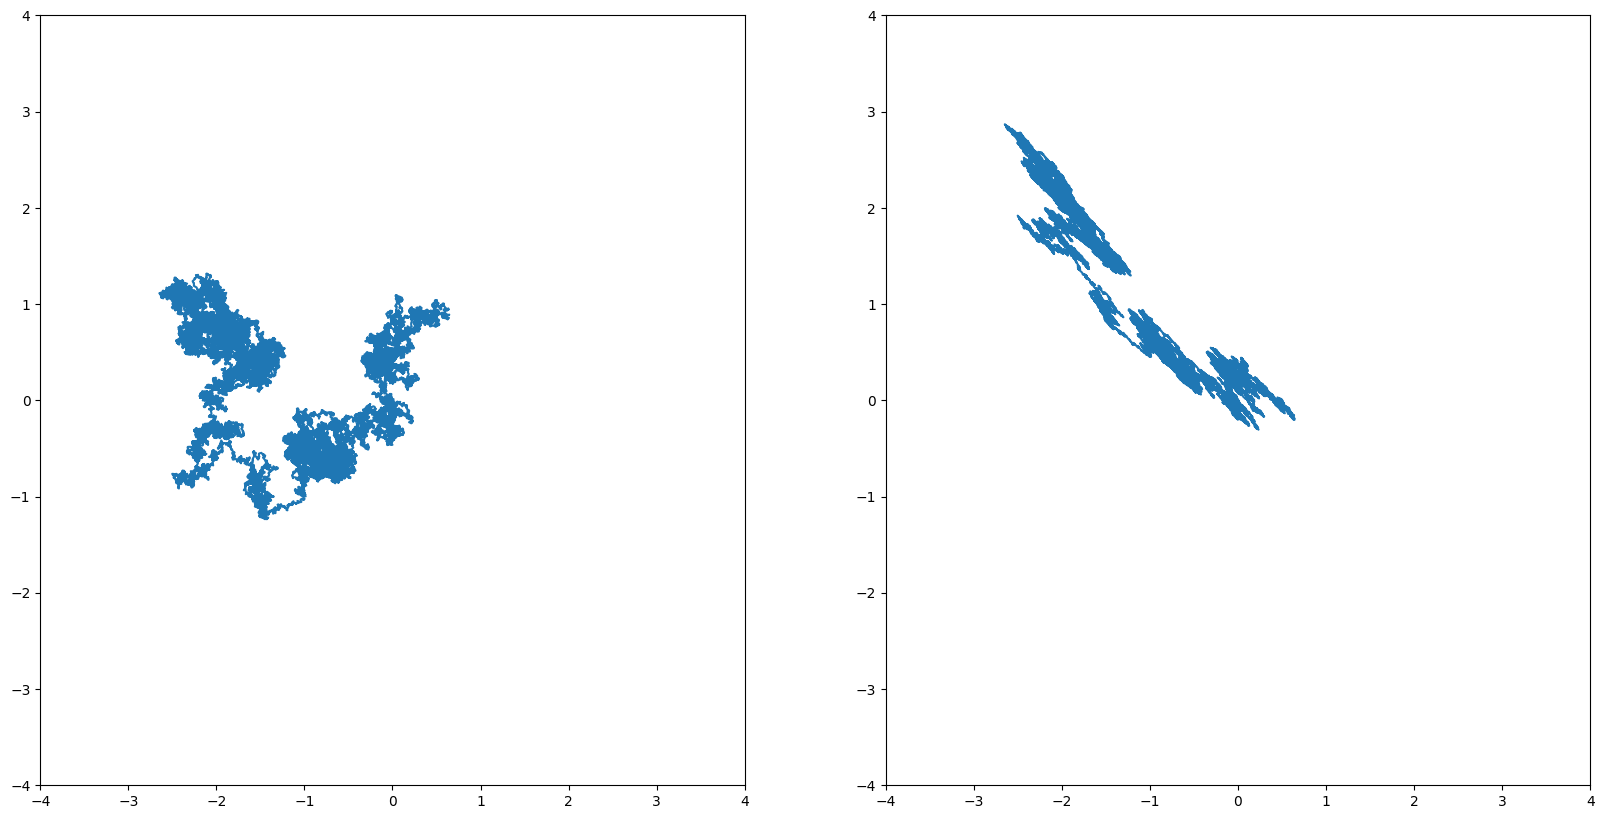

In [3]:
plt.figure(figsize=(20,10))

# Uncorrelated Brownian Motion

B = BrownianMotion(stepsize=0.0001, time=5)

plt.subplot(1,2,1)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot(*B)

# Correlated Brownian Motion
rho = -0.9
W = np.zeros(shape=B.shape)
W[0] = B[0]
W[1] = rho * B[0] + np.sqrt(1 - rho**2) * B[1]

plt.subplot(1,2,2)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot(*W)
plt.show()

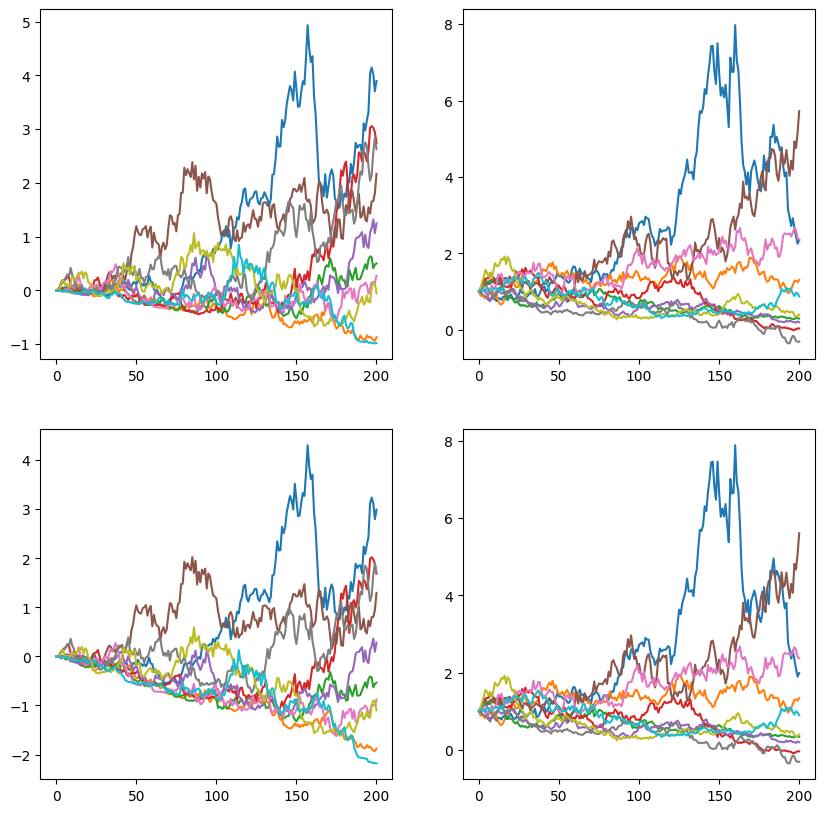

In [4]:
# Brownian Martingales

T = Time(stepsize=0.005, time=1)
plt.figure(figsize=(10,10))

for _ in range(10):
    B = BrownianMotion(stepsize=0.005, time=1)

    Xa = B[0]**2 + B[1]**2 - T
    plt.subplot(2,2,1)
    plt.plot(Xa)

    Ya = np.exp(B[0]) * np.cos(B[1])
    plt.subplot(2,2,2)
    plt.plot(Ya)

    Xb = ItoIntegral(lambda t, x, y : np.array([2 * x, 2 * y]), B)
    plt.subplot(2,2,3)
    plt.plot(Xb)

    Yb = 1 + ItoIntegral(lambda t, x, y : np.array([np.exp(x) * np.cos(y), - np.exp(x) * np.sin(y)]), B)
    plt.subplot(2,2,4)
    plt.plot(Yb)

plt.show()

<AxesSubplot: >

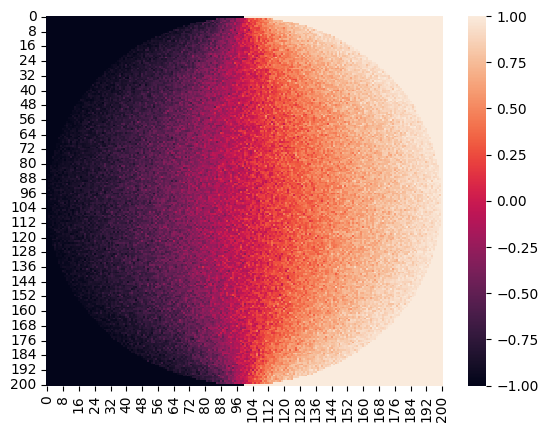

In [5]:
# Dirichlet Problem

epsilon = 0.01
data = np.zeros(shape=(int(2/epsilon)+1, int(2/epsilon)+1))

for i in range(int(2/epsilon)+1):
    for j in range(int(2/epsilon)+1):
        sum = 0
        for _ in range(100):
            B = np.array([[epsilon * i - 1],[epsilon * j - 1]]) + BrownianMotion(stepsize=0.01, time=5)
            outsidetimes = [t for t in range(len(B[0])) if B[0,t]**2 + B[1,t]**2 >= 1]
            while len(outsidetimes)==0:
                B = np.array([[epsilon * i - 1],[epsilon * j - 1]]) + BrownianMotion(stepsize=0.01, time=5)
                outsidetimes = [t for t in range(len(B[0])) if B[0,t]**2 + B[1,t]**2 >= 1]
            tau = np.min(outsidetimes)
            sum += 1 if B[1,tau] >= 0 else -1
        data[i,j] = sum / 100

sns.heatmap(data)